# Problemas de valor en la frontera

$$ y'' = f(t,y,y'); \quad y(a) = y_a,  \quad y(b) = y_b $$
con $t \in [a,b]$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scy

Implementación del método de Shooting para el ejemplo 7.6

$$
y'' = 4y \\
y(0) = 1 \\
y(1) = 3
$$

#### Método de bisección

In [ ]:
def biseccion(a, b ,f, tol):
  if f(a)*f(b) < 0:
    c = 0
    while (b-a)/2 > tol:
      c = (a+b)/2
      if f(c) == 0:
        return c
      elif f(a)*f(c) < 0:
        b = c
      else:
        a = c
    return c
  else:
    return 'Error de condiciones'

#### IVP Solvers

In [ ]:
# Euler
def Euler_stepSize(h, x0, xF, y0, f):
  y = [y0]
  while x0 < xF: #Acortando el intervalo
    y.append(y[-1] + h*f(x0, y[-1]))
    x0 += h
  return np.array(y)

#  RK4
def RK4_stepSize(h, x0, xF, y0, f):
  y = [y0]
  while x0 < xF: # Acortando el intervalo
    s1 = np.array(f(x0, y[-1]))
    s2 = np.array(f(x0 + h/2, y[-1] + h/2*s1))
    s3 = np.array(f(x0 + h/2, y[-1] + h/2*s2))
    s4 = np.array(f(x0 + h, y[-1] + h*s3))

    x0 += h #Aumento del paso

    y.append(y[-1] + h/6*(s1 + 2*s2+ 2*s3 + s4))
  return np.array(y)

## Implementación del BVP

In [ ]:
# Condiciones de frontera
a, b = 0, 1
ya, yb = 1, 3

# Sistema de ODEs equivalente
def f(x, y):
  return np.array([y[1], 4*y[0]])

# Tolerancia de los métodos
tol = 10**-6  # Bisección
h = 10**-3    # Tamaño de paso

# Shooting
def shooting(s, f, a, b, ya, yb, h):
  y_guess = RK4_stepSize(h, a, b, [ya, s], f)
  return y_guess[-1] - yb

# Dependencia única sobre s
phi = lambda s: shooting(s, f, a, b, ya, yb, h)[0] # Es la solución sobre y

# Busqueda de la raíz
yp = biseccion(-1, 0, phi, tol)

In [ ]:
yp

-0.4203052520751953

In [ ]:
sol = RK4_stepSize(h, a, b, [ya, yp], f)[:, 0] # Es la solución de y

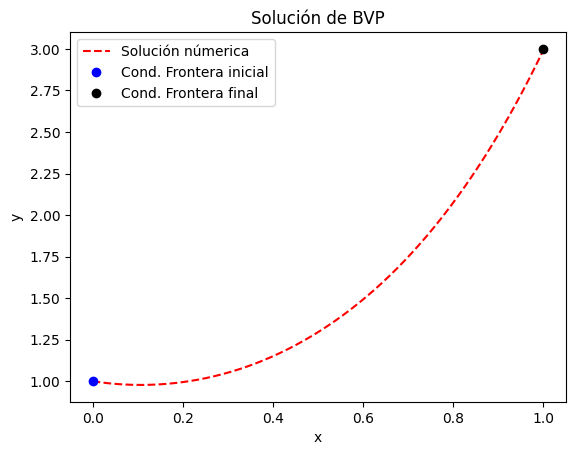

In [ ]:
# Gráfica de la solución
N = int((b-a)/h)
t = np.linspace(a, b, N)

plt.plot(t, sol[: N], 'r--', label = 'Solución númerica')
plt.plot(a, ya, 'ob', label = 'Cond. Frontera inicial')
plt.plot(b, yb, 'ok', label = 'Cond. Frontera final')

plt.title('Solución de BVP')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## **Implementación completa del método de Shooting**

In [ ]:
def BVP_solver(a, b, ya, yb, s1, s2, f, ivp_solver, h = 10**-3, tol = 10**-6):

  # Función de Shooting
  def shooting(s, f, a, b, ya, yb, h):
    y_guess = ivp_solver(h, a, b, [ya, s], f)
    return y_guess[-1] - yb

  # Función auxiliar para s
  phi = lambda s: shooting(s, f, a, b, ya, yb, h)[0] # Es la solución sobre y

  if phi(s1)*phi(s2) > 0:
    print('Las pendientes iniciales tienen el mismo signo')

  # Bisección
  yp = biseccion(s1, s2, phi, tol)

  return ivp_solver(h, a, b, [ya, yp], f)[:, 0] # Es la solución de y

**7.1** Computer problems

* Problema 2:
Inciso a)
$$
9y'' + \pi^2 y = 0 \\
y(0) = -1 \\
y(3/2) = 3
$$

In [ ]:
# Sistema equivalente
def g(t, y):
  return np.array([y[1], -np.pi**2/9*y[0]])

# Condiciones de frontera
a, b = 0.0, 1.5
ya, yb = -1.0, 3.0

# Pendientes inciales
s1, s2 = 3, 4

In [ ]:
# Shooting
def shooting(s, f, a, b, ya, yb, h):
  y_guess = RK4_stepSize(h, a, b, [ya, s], f)
  return y_guess[-1] - yb

# Dependencia única sobre s
phi = lambda s: shooting(s, F, a, b, ya, yb, h)[0] # Es la solución sobre y

In [ ]:
# Encontrar un intervalo para encontrar la pediente adecuada
phi(s1), phi(s2)

(np.float64(-0.13416539778228476), np.float64(0.8207637371703496))

In [ ]:
sol = BVP_solver(a, b, ya, yb, s1, s2, g, RK4_stepSize)

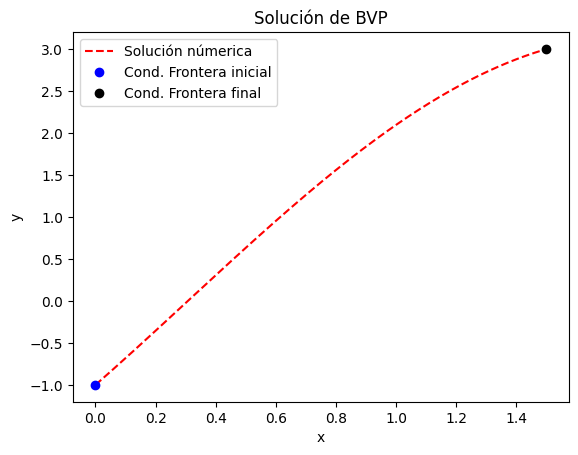

In [ ]:
N = int((b-a)/h)
t = np.linspace(a, b, N)

plt.plot(t, sol[: N], 'r--', label = 'Solución númerica')
plt.plot(a, ya, 'ob', label = 'Cond. Frontera inicial')
plt.plot(b, yb, 'ok', label = 'Cond. Frontera final')

plt.title('Solución de BVP')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Inciso b)
$$
y'' = 3y - 2y' \\
y(0) = e^3 \\
y(1) = 1
$$

In [ ]:
# Sistema equivalente
def F(t, y):
  return np.array([y[1], 3*y[0] - 2*y[1]])

# Condiciones de frontera
a, b = 0, 1
ya, yb = np.exp(3), 1

# Pendientes iniciales
s1, s2 = -60, -62

In [ ]:
# Shooting
def shooting(s, f, a, b, ya, yb, h):
  y_guess = RK4_stepSize(h, a, b, [ya, s], f)
  return y_guess[-1] - yb

# Dependencia única sobre s
phi = lambda s: shooting(s, F, a, b, ya, yb, h)[0] # Es la solución sobre y

In [ ]:
# Encontrar un intervalo para encontrar la pediente adecuada
phi(s1), phi(s2)

(np.float64(0.17119112349248677), np.float64(-1.1630562565530649))

In [ ]:
sol = BVP_solver(a, b, ya, yb, s1, s2, F, RK4_stepSize)

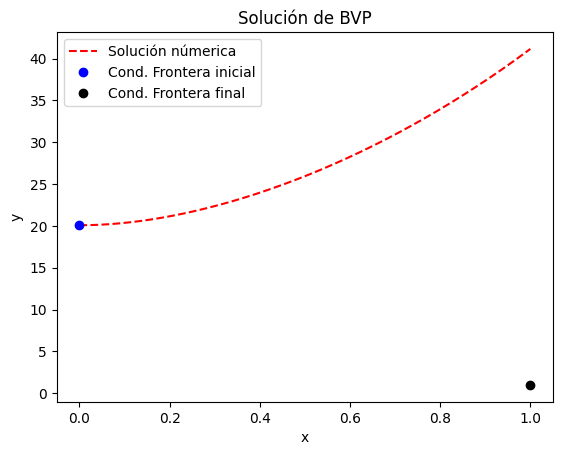

In [ ]:
N = int((b-a)/h)
t = np.linspace(a, b, N)

plt.plot(t, sol[: N], 'r--', label = 'Solución númerica')
plt.plot(a, ya, 'ob', label = 'Cond. Frontera inicial')
plt.plot(b, yb, 'ok', label = 'Cond. Frontera final')

plt.title('Solución de BVP')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()